In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<h1>Loading the preprocessed data</h1>

In [99]:
total_data = pd.read_csv("total_data_version_1.csv")

In [100]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650356 entries, 0 to 13650355
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   city_name         object 
 1   date              object 
 2   avg_temp_c        float64
 3   min_temp_c        float64
 4   max_temp_c        float64
 5   precipitation_mm  float64
 6   country           int64  
 7   state             int64  
 8   latitude          float64
 9   longitude         float64
 10  capital           int64  
 11  region            int64  
 12  continent         int64  
 13  season_Spring     int64  
 14  season_Summer     int64  
 15  season_Winter     int64  
dtypes: float64(6), int64(8), object(2)
memory usage: 1.6+ GB


<AxesSubplot:>

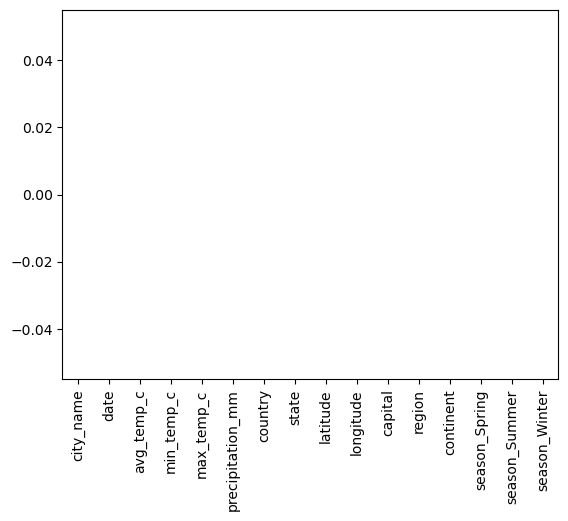

In [101]:
total_data.isna().sum().plot(kind='bar')

<h3> Dropping columns for tranning </h3>

In [102]:
X = total_data.drop(columns=["city_name","date","avg_temp_c"])
y = total_data["avg_temp_c"]

In [103]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [104]:
X_train.shape, X_test.shape

((10920284, 13), (2730072, 13))

In [110]:
y_train.shape, y_test.shape

((10920284,), (2730072,))

<p> Data for training a machine learning model by dropping unnecessary columns from the feature set (X) and separating the target variable (y). A DataFrame X by dropping the specified columns ("city_name", "date", "avg_temp_c") from the total_data DataFrame. These columns are dropped because "city_name" and "date" may not directly contribute to predicting the average temperature, and "avg_temp_c" is the target variable. A Series y containing the target variable "avg_temp_c" from the total_data DataFrame. Splits the data into training and testing sets. It randomly shuffles the samples and splits them into two sets: one for training the model (X_train and y_train) and one for evaluating its performance (X_test and y_test). The test_size parameter specifies the proportion of the dataset to include in the test split, and random_state ensures reproducibility </p>

<h1> Linear Regression </h1>

In [105]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [106]:
start_time = time.time()
model = train_linear_model(X_train, y_train)
end_time = time.time()

model_score = model.score(X_test, y_test) * 100

print(f"Total time taken for training: {end_time - start_time:.2f} seconds")
print("Model Score:", f"{model_score:.2f}%")

Total time taken for training: 3.09 seconds
Model Score: 91.85%


<h1> Logistic Regression </h1>

In [111]:
def train_logistic_model(X, y, penalty='l2', solver='liblinear'):
    model = LogisticRegression(penalty=penalty, solver=solver)
    model.fit(X, y)
    return model

In [112]:
bins = [-np.inf, 27, np.inf]
labels = ['cold', 'hot']
y = pd.cut(total_data['avg_temp_c'], bins=bins, labels=labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [113]:
solvers = ['liblinear', 'lbfgs', 'newton-cg']
for solver in solvers:
    start_time = time.time()
    model = train_logistic_model(X_train, y_train, solver=solver)
    end_time = time.time()
    
    model_score = model.score(X_test, y_test) * 100
    
    print(f"Total time taken for training: {end_time - start_time:.2f} seconds for solver {solver} and Score is {model_score:.2f}%")

Total time taken for training: 145.03 seconds for solver liblinear and Score is 92.22%
Total time taken for training: 54.71 seconds for solver lbfgs and Score is 87.67%
Total time taken for training: 202.87 seconds for solver newton-cg and Score is 92.22%


<p> This code takes input features (X) and target labels (y) as parameters, along with optional parameters for penalty and solver. The model is trained on the input data using the fit method and returned. The target labels are defined based on the average temperature (avg_temp_c) column in the dataset. It discretizes the temperature values into two categories: 'cold' and 'hot', based on predefined temperature bins. The code iterates over different solver options for logistic regression ('liblinear', 'lbfgs', 'newton-cg'). For each solver, it measures the time taken to train the model (training time) and evaluates the model's accuracy score on the test data.</p>

<h1> Random Forest </h1>

In [45]:
def random_forest_model(X, y, n_estimators=3, random_state=42):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X, y)
    return model

In [46]:
start_time = time.time()
rf_classifier_model = random_forest_model(X_train, y_train)
end_time = time.time()
print(f"Total time for training: {end_time - start_time:.2f} seconds")

y_pred = rf_classifier_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Random Forest Classifier Model Accuracy: {accuracy_percentage:.2f}%")

Total time for training: 45.52 seconds
Random Forest Classifier Model Accuracy: 95.83%


<h1> Elastic Net </h1>

In [68]:
def elasticNet_model(X_train, X_test, y_train, y_test, selection='random'):
    model = ElasticNet(selection=selection)
    model.fit(X_train, y_train)
    return model

<p> This code defines two functions: elasticNet_model and evaluate_model. The elasticNet_model function initializes and trains an ElasticNet regression model using the provided training data (X_train and y_train). It takes an optional parameter selection which determines the algorithm used for fitting the model, with 'random' as the default. The function returns the trained model. </p>

In [69]:
def evaluate_model(X_train, X_test, y_train, y_test, selection='random'):
    start_time = time.time()
    model = elasticNet_model(X_train, X_test, y_train, y_test, selection=selection)
    end_time = time.time()
    accuracy = model.score(X_test, y_test) * 100
    print(f"Total time taken for training: {end_time - start_time:.2f} seconds for selection '{selection}' and score is {accuracy:.2f}%")

<p> The evaluate_model function takes the same training and testing data along with the selection parameter. It measures the time taken to train the model using elasticNet_model, calculates the accuracy score of the trained model on the testing data, and prints out the time taken for training and the accuracy score. This function provides a convenient way to evaluate the performance of the ElasticNet model with different selection algorithms ('random' or 'cyclic').</p>

In [70]:
evaluate_model(X_train, X_test, y_train, y_test, selection='random')
evaluate_model(X_train, X_test, y_train, y_test, selection='cyclic')

Total time taken for training: 4.17 seconds for selection 'random' and score is 91.45%
Total time taken for training: 2.54 seconds for selection 'cyclic' and score is 91.45%
